This notebook automatically downloads, compiles and run the code for the paper [Spontaneous emergence of fast attractor dynamics in a model of developing primary visual cortex](https://www.nature.com/articles/ncomms13208), by
Thomas Miconi, Jeffrey L. McKinstry and Gerald M. Edelman (Nature Communications volume 7, Article number: 13208, 2016). 

It also generates the main figure from the paper.

By default, it uses the pre-trained weights included in the code base. Uncomment and run the relevant cell (`./stdp learn`, below) to run the training yourself.

I ran the new code, with MOD (rescaling  of the LGN inputs to max 70 io 126 before the log transform, which was the previous value and should create less compressed inputs), and with default params. It was kind of OK. Actually  not very good in the test. But it seemed better than before! corr w/w.T .40 at gen 500K.


For some reason, resps.txt (obtained during training) has much better clutering than resps_test.txt. 

Now I'm trying also this same code, but with the COMMAND.sh parameters. Meh, corr .38 at 500K/600K, resps is OK, resps_test is bad...

Even if testing for  100K presentations, last and first 1000 have same bad outcome in  cluster.py.

Trying MOD 1/126, i.e. inputs scaled to max 1 before log (savModMax1) . Yeah, now it works. stdptest makes nice small clusters including clear majority of responses, corr w/w.T = .63 (actually decays a little bit after 200K?) at 500K

Trying new params: Seems worse! Poor clustering, corr w/w.T  peaks at .45 at ~300K, decays a bit after.

Should try again with default params but different random seed to get an idea of variance.

Trying Mod Max 1, default params, but srand(1) i.o. srand(0). Different outputs on local machine vs. Google colab for exact same code (highly reproducible for each machine/seed)! Peeks at .67 (300K) for seed 1... But clusters are  less pretty than savModMax1. Is it because I stopped at  500K ? No, I did the same with previous run. Just random variance...






In [1]:
!wget https://gitlab.com/libeigen/eigen/-/archive/3.2.10/eigen-3.2.10.zip
!unzip eigen-3.2.10.zip

--2022-09-27 01:25:30--  https://gitlab.com/libeigen/eigen/-/archive/3.2.10/eigen-3.2.10.zip
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘eigen-3.2.10.zip’

eigen-3.2.10.zip        [    <=>             ]   2.18M  3.46MB/s    in 0.6s    

2022-09-27 01:25:31 (3.46 MB/s) - ‘eigen-3.2.10.zip’ saved [2288916]

Archive:  eigen-3.2.10.zip
1c9aa054c776e16ef872cbd58cb77eef2b732891
   creating: eigen-3.2.10/
  inflating: eigen-3.2.10/.hgeol     
  inflating: eigen-3.2.10/.hgignore  
  inflating: eigen-3.2.10/CMakeLists.txt  
  inflating: eigen-3.2.10/COPYING.BSD  
  inflating: eigen-3.2.10/COPYING.GPL  
  inflating: eigen-3.2.10/COPYING.LGPL  
  inflating: eigen-3.2.10/COPYING.MINPACK  
  inflating: eigen-3.2.10/COPYING.MPL2  
  inflating: eigen-3.2.10/COPYING.README  
  inflating: eigen-

In [2]:
!git clone  https://github.com/ThomasMiconi/V1stdp.git 
!cp ./V1stdp/* .

Cloning into 'V1stdp'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 43 (delta 10), reused 0 (delta 0), pack-reused 19
Unpacking objects: 100% (43/43), done.


In [3]:
!g++ -I ./eigen-3.2.10/ -O3 -w -std=c++11 stdp.cpp -o stdp

In [4]:
!ls -ltr

total 35272
drwxr-xr-x 14 root root     4096 Oct  4  2016 eigen-3.2.10
drwxr-xr-x  1 root root     4096 Sep 22 13:42 sample_data
-rw-r--r--  1 root root  2288916 Sep 27 01:25 eigen-3.2.10.zip
drwxr-xr-x  3 root root     4096 Sep 27 01:25 V1stdp
-rw-r--r--  1 root root    12205 Sep 27 01:25 analyzewlat.m
-rw-r--r--  1 root root     3640 Sep 27 01:25 makepatchesImageNetInt8.m
-rw-r--r--  1 root root    43110 Sep 27 01:25 makefigures.m
-rw-r--r--  1 root root      109 Sep 27 01:25 COMMANDTEST.sh
-rw-r--r--  1 root root      110 Sep 27 01:25 COMMAND.sh
-rw-r--r--  1 root root   115200 Sep 27 01:25 w.dat
-rw-r--r--  1 root root    43660 Sep 27 01:25 stdp.cpp
-rw-r--r--  1 root root     1433 Sep 27 01:25 showw.m
-rw-r--r--  1 root root     2617 Sep 27 01:25 README.md
-rw-r--r--  1 root root 31790000 Sep 27 01:25 patchesCenteredScaledBySumTo126ImageNetONOFFRotatedNewInt8.bin.dat
-rw-r--r--  1 root root   554880 Sep 27 01:25 wff.dat
-rw-r--r--  1 root root   832321 Sep 27 01:25 wff.txt
-rw-r--

Only uncomment and run the following if you want to train a  full network yourself, rather than use the pre-trained weights in `w.dat` and `wff.dat`. This should run for 500K presentations and could take about a day.

Note that the first few presentations are quite fast, but it gets slower once the plasticity kicks in.

In [5]:
# !./stdp learn

We run the pre-trained network (whose weights are contained in `w.dat` and `wff.dat`) for 1000 image presentations, without any plasticity (i.e. frozen weights, and record the resulting network activity in `resps_test.txt`.

In [6]:
!./stdp test


Reading weights from file w.dat
Done!

Reading weights from file wff.dat
Done!
First row of w (lateral weights):           0 1.89561e-08 2.86936e-05 2.82519e-08 1.72447e-05     1.65576 2.91204e-05  0.00289016 2.20178e-05 3.15481e-05           0           0  2.3314e-05 0.000338642 3.30049e-05           0     1.03991 0.000576191 0.000463962           0 7.74012e-05     1.33985 0.000131912 2.44616e-15 0.000246208 2.61463e-05 1.15189e-05           0 3.58251e-05  0.00408018 8.61446e-06 2.44616e-15           0  0.00530016           0 0.000431552 0.000673886 9.10588e-06 0.000493612 0.000600835 5.31201e-05 0.000100984 4.53478e-06 2.74071e-05 0.000401404 0.000426343 2.76872e-08           0           0    0.669453           0 0.000201132    0.568922 7.76495e-05 2.09693e-05  0.00048549 1.98732e-05 3.64603e-05 6.43741e-05 0.000440017 9.04503e-05 8.08949e-06    0.713689    0.272571   0.0018007 5.45771e-06 0.000385266 0.000265531     3.10826 0.000400256 2.85407e-05 1.18226e-05   0.0103192  0.0013757

We generate the main figure from the paper (clusters of activity patterns among the network's responses to the 1000 image presentation). This is adapted from the Matlab code in `makefigures.m`.

Correlation between the matrix of excitatory weights and its  transpose:
[[1.         0.63826684]
 [0.63826684 1.        ]]


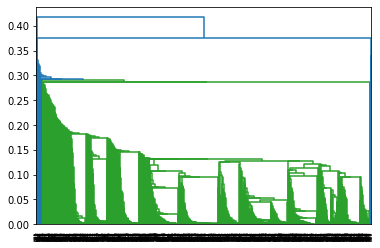

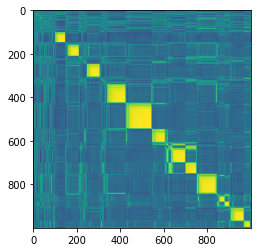

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from  scipy.cluster.hierarchy import dendrogram, linkage

print("Correlation between the matrix of excitatory weights and its  transpose:")
w = np.loadtxt('w.txt'); w = w[:100, :100]; print(np.corrcoef(w.flatten(), w.T.flatten())[0,1])

#r = np.loadtxt('resps.txt')   # This is the file generated by the training proces, ./stdp learn, which contains network responses to the last 2000 stimuli at any time during training.
r = np.loadtxt('resps_test.txt')    # Network responses  to the test stimuli (frozen weights).

r = r[:100, -1000:]     # We only include the excitatory neurons (first 100 neurons) and the last 1000 presentations
#r = r[:100, :1000]

c = np.corrcoef(r.T)

l = linkage(c, method='single', metric='correlation')

print("Tree resulting from the hirearchical clustering of response patterns according to their mutual correlation:")
plt.figure()
dn = dendrogram(l)   # Like the Matlab version, dendrogram obligately generates a figure that cnnot be suppressed, even though we only use it to obtain the leaves' order for our cluster figure.

order = dn['leaves']
c2 = c[order, :]; c3 = c2[:, order]

print("Clusters of response patterns:")
plt.figure()
plt.imshow(c3)

plt.show()